# # Classifiers introduction

In the following program we introduce the basic steps of classification of a dataset in a matrix

Import the package for learning and modeling trees

In [1]:
from sklearn import tree 

Define the matrix containing the data (one example per row)
and the vector containing the corresponding target value

In [2]:
X = [[0, 0, 0], [1, 1, 1], [0, 1, 0], [0, 0, 1], [1, 1, 0], [1, 0, 1]]
Y = [1, 0, 0, 0, 1, 1]

Declare the classification model you want to use and then fit the model to the data

In [3]:
clf = tree.DecisionTreeClassifier()
clf = clf.fit(X, Y) # addestra il modello 

Predict the target value (and print it) for the passed data, using the fitted model currently in clf

In [4]:
print(clf.predict([[0, 1, 1]]))

[0]


In [5]:
print(clf.predict([[1, 0, 1],[0, 0, 1]]))



[1 0]


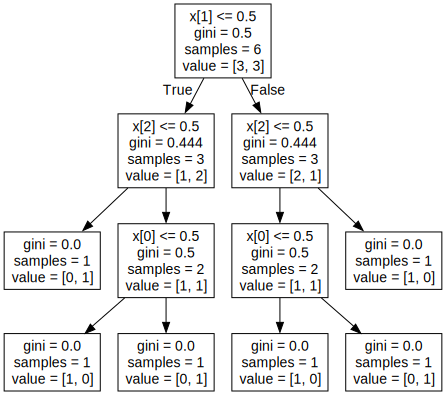

In [8]:
import graphviz 
dot_data = tree.export_graphviz(clf, out_file=None)  
graph = graphviz.Source(dot_data)  
graph
# primo split sulla seconda feature (x[1]), soglia si split 0.5, se sotto vai a sinistra sennò vai a destra
# value = [3,3] è un vettore che mi dice che ci sono 3 esempi etichettati 1 e 3 esempi etichettati 0
# samples indica il nuero di esempi in quel segmento 
# non ho usato paticolari paramntri, quindi fa overfitting, ho foglie con 1 solo esempio

In the following we start using a dataset (from UCI Machine Learning repository)

In [9]:
from sklearn.datasets import load_iris
iris = load_iris() # ci sono X e Y
# 4 features numeriche, 3 classi, bilanciato, 50 esempi per ogni classe (150 totali)

# Declare the type of prediction model and the working criteria for the model induction algorithm

In [12]:
clf = tree.DecisionTreeClassifier(criterion="entropy",random_state=300,min_samples_leaf=5,class_weight={0:1,1:1,2:1})
# uso come criterio di split l'entropia, inizializza in maniera casuale la divisione tra treining set e test set
# min_samples serve a impedire di fare fogli con meno elementi di questa soglia, si ferma
# gli do i pesi da associare alle classi, con questi paramentri sono tutte uguali

# Split the dataset in training and test set

In [244]:
# Generate a random permutation of the indices of examples that will be later used 
# for the training and the test set
import numpy as np
np.random.seed(0)
indices = np.random.permutation(len(iris.data))
# permutazione casuale, per ricavare gli indici che usaimo per dividere test set e training set, così non modifico direttamente il dataset

# We now decide to keep the last 10 indices for test set, the remaining for the training set
indices_training=indices[:-10]
indices_test=indices[-10:]

iris_X_train = iris.data[indices_training] # keep for training all the matrix elements with the exception of the last 10 
iris_y_train = iris.target[indices_training]
iris_X_test  = iris.data[indices_test] # keep the last 10 elements for test set
iris_y_test  = iris.target[indices_test]

# Fit the learning model on training set

In [14]:
# fit the model to the training data
clf = clf.fit(iris_X_train, iris_y_train) #apprendimento vero e proprio

# Obtain predictions

In [15]:
# apply fitted model "clf" to the test set 
predicted_y_test = clf.predict(iris_X_test)

# print the predictions (class numbers associated to classes names in target names)
print("Predictions:")
print(predicted_y_test)
print("True classes:")
print(iris_y_test) 
print(iris.target_names)

Predictions:
[1 2 1 0 0 0 2 1 2 0]
True classes:
[1 1 1 0 0 0 2 1 2 0]
['setosa' 'versicolor' 'virginica']


Print the index of the test instances and the corresponding predictions

In [16]:
# print the corresponding instances indexes and class names 
for i in range(len(iris_y_test)): 
    print("Instance # "+str(indices_test[i])+": ")
    print("Predicted: "+iris.target_names[predicted_y_test[i]]+"\t True: "+iris.target_names[iris_y_test[i]]+"\n")

Instance # 88: 
Predicted: versicolor	 True: versicolor

Instance # 70: 
Predicted: virginica	 True: versicolor

Instance # 87: 
Predicted: versicolor	 True: versicolor

Instance # 36: 
Predicted: setosa	 True: setosa

Instance # 21: 
Predicted: setosa	 True: setosa

Instance # 9: 
Predicted: setosa	 True: setosa

Instance # 103: 
Predicted: virginica	 True: virginica

Instance # 67: 
Predicted: versicolor	 True: versicolor

Instance # 117: 
Predicted: virginica	 True: virginica

Instance # 47: 
Predicted: setosa	 True: setosa



# Look at the specific examples

In [17]:
for i in range(len(iris_y_test)): 
    print("Instance # "+str(indices_test)+": ")
    s=""
    for j in range(len(iris.feature_names)):
        s=s+iris.feature_names[j]+"="+str(iris_X_test[i][j])
        if (j<len(iris.feature_names)-1): s=s+", "
    print(s)
    print("Predicted: "+iris.target_names[predicted_y_test[i]]+"\t True: "+iris.target_names[iris_y_test[i]]+"\n")

Instance # [ 88  70  87  36  21   9 103  67 117  47]: 
sepal length (cm)=5.6, sepal width (cm)=3.0, petal length (cm)=4.1, petal width (cm)=1.3
Predicted: versicolor	 True: versicolor

Instance # [ 88  70  87  36  21   9 103  67 117  47]: 
sepal length (cm)=5.9, sepal width (cm)=3.2, petal length (cm)=4.8, petal width (cm)=1.8
Predicted: virginica	 True: versicolor

Instance # [ 88  70  87  36  21   9 103  67 117  47]: 
sepal length (cm)=6.3, sepal width (cm)=2.3, petal length (cm)=4.4, petal width (cm)=1.3
Predicted: versicolor	 True: versicolor

Instance # [ 88  70  87  36  21   9 103  67 117  47]: 
sepal length (cm)=5.5, sepal width (cm)=3.5, petal length (cm)=1.3, petal width (cm)=0.2
Predicted: setosa	 True: setosa

Instance # [ 88  70  87  36  21   9 103  67 117  47]: 
sepal length (cm)=5.1, sepal width (cm)=3.7, petal length (cm)=1.5, petal width (cm)=0.4
Predicted: setosa	 True: setosa

Instance # [ 88  70  87  36  21   9 103  67 117  47]: 
sepal length (cm)=4.9, sepal width (c

# Obtain model performance results

In [ ]:
# print some metrics results
from sklearn.metrics import accuracy_score
from sklearn.metrics import f1_score
acc_score = accuracy_score(iris_y_test, predicted_y_test)
print("Accuracy score: "+ str(acc_score))
f1=f1_score(iris_y_test, predicted_y_test, average='macro') #media armonica tra procedures e recall
print("F1 score: "+str(f1))

Accuracy score: 0.9
F1 score: 0.885714285714


# Use Cross Validation

In [27]:
from sklearn.datasets import load_iris
from sklearn.model_selection import cross_val_score # will be used to separate training and test
iris = load_iris()
clf = tree.DecisionTreeClassifier(criterion="entropy",random_state=300,min_samples_leaf=5,class_weight={0:1,1:1,2:1})
clf = clf.fit(iris.data, iris.target)
scores = cross_val_score(clf, iris.data, iris.target, cv=6) # score will be the accuracy, sv è il numero di fold in cui dividere il dataset
print(scores)

[0.96 1.   0.96 0.92 0.92 1.  ]


In [28]:
# computes F1- score
f1_scores = cross_val_score(clf, iris.data, iris.target, cv=5, scoring='f1_macro')
print(f1_scores)

[0.96658312 1.         0.86111111 0.86666667 1.        ]


# Show the resulting tree 

## 1. Print the picture in a PDF file

In [29]:
import graphviz 
dot_data = tree.export_graphviz(clf, out_file=None) 
graph = graphviz.Source(dot_data) 
graph.render("my_iris_predictions")

'my_iris_predictions.pdf'

## 2. Generate a picture here

In [30]:
print(list(iris.feature_names))
print(list(iris.target_names))

['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)']
['setosa', 'versicolor', 'virginica']


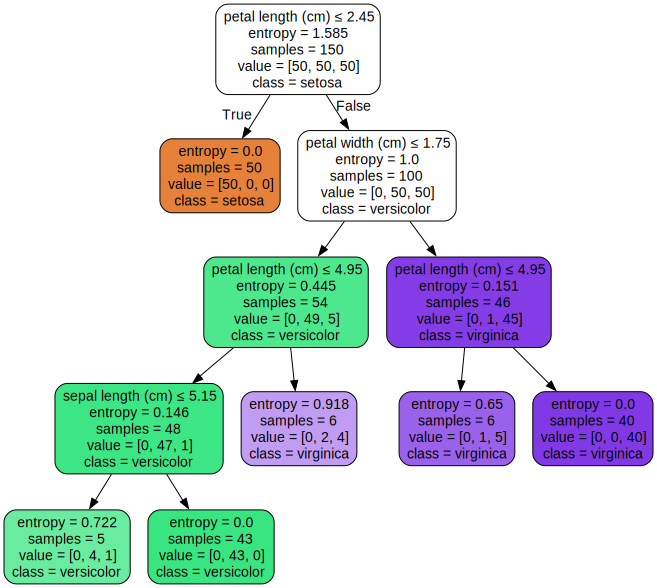

In [31]:
dot_data = tree.export_graphviz(clf, out_file=None, 
                         feature_names=iris.feature_names, 
                         class_names=iris.target_names, 
                         filled=True, rounded=True,  
                         special_characters=True)  
graph = graphviz.Source(dot_data)  
graph

# Your work: what you have to do
Modify the given Jupyter notebook on decision trees on Iris data and perform the following tasks:



1. get an artificial inflation of some class in the training set by a given factor: 10 (weigh more the classes virginica e versicolor which are more difficult to discriminate). Learn the tree in these conditions.



In [290]:
import pandas as pd

class_weights = {0: 1, 1: 1, 2: 1} 

indices = np.random.permutation(len(iris.data))
indices_training = indices[:-10]
indices_test = indices[-10:]
iris_X_train = iris.data[indices_training]
iris_y_train = iris.target[indices_training]
iris_X_test = iris.data[indices_test]
iris_y_test = iris.target[indices_test]

inflated_iris_X_train = []
inflated_iris_y_train = []
for i, y in enumerate(iris_y_train):
    inflated_iris_X_train.append(iris_X_train[i])
    inflated_iris_y_train.append(y)
    if y == 1 :
        for _ in range(10):  # Duplica l'esempio 10 volte
            inflated_iris_X_train.append(iris_X_train[i])
            inflated_iris_y_train.append(y)

augmented_iris_X_train = np.array(inflated_iris_X_train)
augmented_iris_y_train = np.array(inflated_iris_y_train)

clf_inflated = tree.DecisionTreeClassifier(criterion="entropy", random_state=300, min_samples_leaf=5)
clf_inflated = clf_inflated.fit(augmented_iris_X_train, augmented_iris_y_train)

predicted_y_test_inflated = clf_inflated.predict(iris_X_test)
acc_score = accuracy_score(iris_y_test, predicted_y_test_inflated)
print("Accuracy:", acc_score)

clf_cv = tree.DecisionTreeClassifier(criterion="entropy", random_state=300, min_samples_leaf=5, class_weight=class_weights)
scores = cross_val_score(clf_cv, iris.data, iris.target, cv=5)

f1_scores = cross_val_score(clf_cv, iris.data, iris.target, cv=5, scoring='f1_macro')

results_df = pd.DataFrame({'CV score': scores,
                           'F1 Score': f1_scores})

# Print the results table
print(results_df)


Accuracy: 1.0
   CV score  F1 Score
0  0.966667  0.966583
1  1.000000  1.000000
2  0.866667  0.861111
3  0.866667  0.866667
4  1.000000  1.000000





1.b) modify the weight of some classes (set to 10 the weights for misclassification between virginica into versicolor and vice versa) and learn the tree in these conditions. You should obtain similar results as for step 1.


In [287]:

clf = tree.DecisionTreeClassifier(criterion="entropy", random_state=300, min_samples_leaf=5, class_weight={0: 1, 1: 10, 2: 1})
clf = clf.fit(iris_X_train, iris_y_train)

predicted_y_test = clf.predict(iris_X_test)
acc_score = accuracy_score(iris_y_test, predicted_y_test)
print("Accuracy:", acc_score)

scores = cross_val_score(clf, iris.data, iris.target, cv=5)

f1_scores = cross_val_score(clf_cv, iris.data, iris.target, cv=5, scoring='f1_macro')

results_df = pd.DataFrame({'CV score': scores,
                           'F1 Score': f1_scores})

# Print the results table
print(results_df)


Accuracy: 0.8
   CV score  F1 Score
0  0.933333  0.966583
1  0.900000  1.000000
2  0.900000  0.861111
3  0.933333  0.866667
4  0.933333  1.000000



2. learn trees but try to avoid overfitting (by improving the error on the test set) tuning the hyper-parameters on: the minimum number of samples per leaf, max depth of the tree, min_impurity_decrease parameters, max leaf nodes, etc.


In [270]:
from sklearn.model_selection import GridSearchCV


iris = load_iris()

class_weights = {0: 1, 1: 1, 2: 1} 

indices = np.random.permutation(len(iris.data))
indices_training = indices[:-10]
indices_test = indices[-10:]
iris_X_train = iris.data[indices_training]
iris_y_train = iris.target[indices_training]
iris_X_test = iris.data[indices_test]
iris_y_test = iris.target[indices_test]

param_grid = {
    'criterion': ['gini', 'entropy'],
    'splitter': ['best', 'random'],
    'max_depth': [None, 5, 10],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 3, 5],
    'max_features': [None, 'sqrt', 'log2'],
    'random_state': [None, 42],
    'max_leaf_nodes': [None, 5, 10],
    'min_impurity_decrease': [0.0, 0.1, 0.2],
    'class_weight': [None, 'balanced']
}

clf = tree.DecisionTreeClassifier()

grid_search = GridSearchCV(clf, param_grid, cv=5)
grid_search.fit(iris.data, iris.target)

best_params = grid_search.best_params_
print("Best parameters:", best_params)


KeyboardInterrupt: 

In [291]:
from sklearn.model_selection import cross_val_score
from sklearn.tree import DecisionTreeClassifier


clf_tuned = DecisionTreeClassifier(class_weight='balanced', criterion='gini', max_features='log2', max_leaf_nodes=5, min_impurity_decrease=0, min_samples_leaf=1,min_samples_split=10, splitter='best')
clf_tuned = clf_tuned.fit(iris_X_train, iris_y_train)


# Perform cross-validation
cv_scores = cross_val_score(clf_tuned, iris.data, iris.target, cv=5)
cv_f1_scores = cross_val_score(clf_tuned, iris.data, iris.target, cv=5, scoring='f1_macro')

predicted_y_test_tuned = clf_tuned.predict(iris_X_test)
acc_score = accuracy_score(iris_y_test, predicted_y_test_tuned)
print("Accuracy:", acc_score)
# Create a DataFrame to display the results
results_df = pd.DataFrame({'CV score': cv_scores,
                           'F1 Score': cv_f1_scores})

# Print the results table
print(results_df)

Accuracy: 0.9
   CV score  F1 Score
0  0.933333  0.966583
1  0.966667  0.966583
2  0.866667  0.932660
3  0.933333  0.933333
4  1.000000  1.000000


3. build the confusion matrix of the created tree models on the test set and show them. 


In [295]:
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(iris_y_test, predicted_y_test)
cm_inflated = confusion_matrix(iris_y_test, predicted_y_test_inflated)
cm_tuned = confusion_matrix(iris_y_test, predicted_y_test_tuned)

print("Confusion Matrix:")
print(cm)
print("Confusion Matrix inflated:")
print(cm_inflated)
print("Confusion Matrix tuned:")
print(cm_tuned)

Confusion Matrix:
[[0 1 1]
 [1 0 3]
 [1 0 3]]
Confusion Matrix inflated:
[[2 0 0]
 [0 4 0]
 [0 0 4]]
Confusion Matrix tuned:
[[2 0 0]
 [0 4 0]
 [0 1 3]]


4. build the ROC curves (or coverage curves in coverage space) and plot them for each tree model you have created: for each model you have to build three curves, one for each class, considered in turn as the positive class.

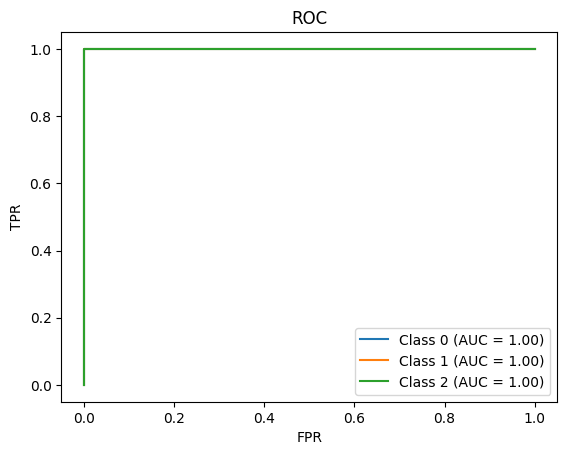

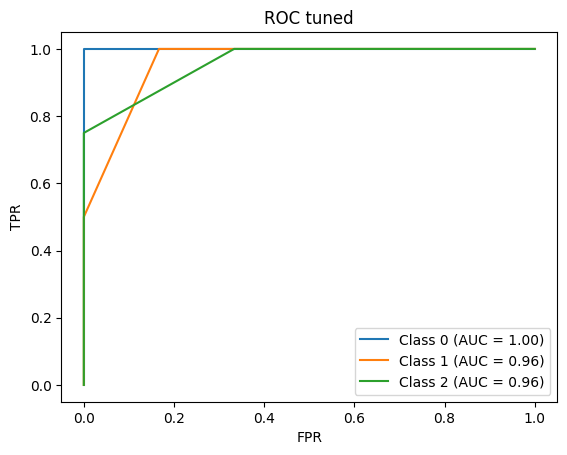

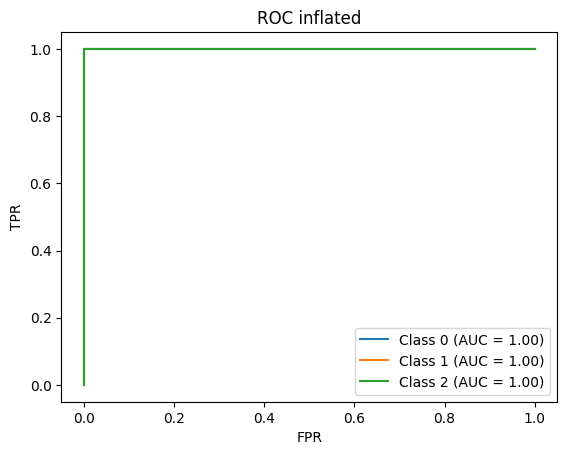

In [297]:
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt
import numpy as np


for class_label in range(3):

    binary_labels = np.where(iris_y_test == class_label, 1, 0)

    class_probabilities = clf.predict_proba(iris_X_test)[:, class_label]
    
    fpr, tpr, thresholds = roc_curve(binary_labels, class_probabilities)

    roc_auc = auc(fpr, tpr)

    plt.plot(fpr, tpr, label='Class {} (AUC = {:.2f})'.format(class_label, roc_auc)) 

plt.title('ROC')
plt.xlabel('FPR')
plt.ylabel('TPR')

plt.legend(loc='lower right')

plt.show()

for class_label in range(3):

    binary_labels = np.where(iris_y_test == class_label, 1, 0)

    class_probabilities = clf_tuned.predict_proba(iris_X_test)[:, class_label]

    fpr, tpr, thresholds = roc_curve(binary_labels, class_probabilities)

    roc_auc = auc(fpr, tpr)

    plt.plot(fpr, tpr, label='Class {} (AUC = {:.2f})'.format(class_label, roc_auc)) 

plt.title('ROC tuned')
plt.xlabel('FPR')
plt.ylabel('TPR')

plt.legend(loc='lower right')

plt.show()

for class_label in range(3):

    binary_labels = np.where(iris_y_test == class_label, 1, 0)

    class_probabilities = clf_inflated.predict_proba(iris_X_test)[:, class_label]

    fpr, tpr, thresholds = roc_curve(binary_labels, class_probabilities)

    roc_auc = auc(fpr, tpr)

    plt.plot(fpr, tpr, label='Class {} (AUC = {:.2f})'.format(class_label, roc_auc)) 

plt.title('ROC inflated')
plt.xlabel('FPR')
plt.ylabel('TPR')

plt.legend(loc='lower right')

plt.show()